## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 02 Example 007

In [1]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

np.random.seed(1968)

In [2]:
def f(x):
    """The function used to predict."""
    y = 1.968 * (x * np.cos(x))
    return y

## Part A - Noiseless Predictions

In [3]:
#  First the noiseless data
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, with the prediction and its MSE
x = np.atleast_2d(np.linspace(0, 9, 1000)).T

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, 
                              optimizer='fmin_l_bfgs_b',
                              alpha=1e-10,
                              n_restarts_optimizer=10,
                              random_state=0)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

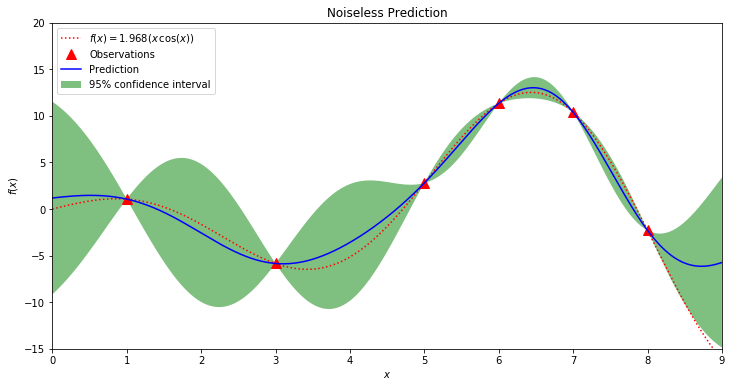

In [4]:
# Plot the function, the prediction and the 95% confidence interval based on the MSE
fig1=plt.figure(figsize=(12,6))
plt.title('Noiseless Prediction')
plt.plot(x, f(x), 'r:', label=u'$f(x) = 1.968(x\,\cos(x))$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations', marker='^')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.963 * sigma,
                        (y_pred + 1.963 * sigma)[::-1]]),
         alpha=.5, fc='g', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0, 9)
plt.ylim(-15, 20)
plt.legend(loc='upper left')

plt.show()

In [5]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-007-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 05


## Part B - With Noise Predictions

In [6]:
# Prepare the with noise data
X = np.linspace(0.0, 8.0, 10)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, 
                              optimizer='fmin_l_bfgs_b',
                              alpha=dy ** 2,
                              n_restarts_optimizer=10,
                              random_state=0)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

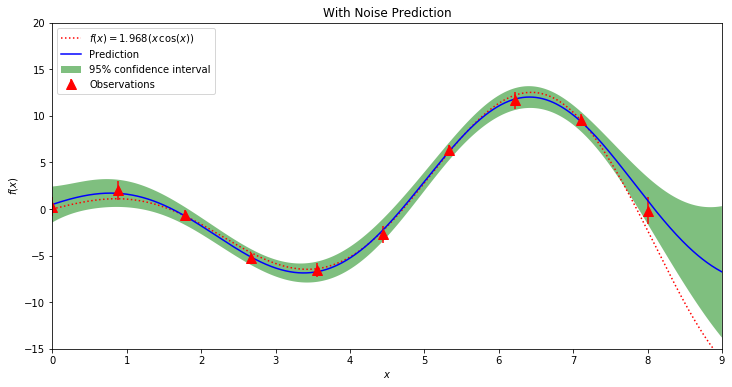

In [7]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig2=plt.figure(figsize=(12,6))
plt.title('With Noise Prediction')
plt.plot(x, f(x), 'r:', label=u'$f(x) = 1.968(x\,\cos(x))$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations', marker='^')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.963 * sigma,
                        (y_pred + 1.963 * sigma)[::-1]]),
         alpha=.5, fc='g', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.xlim(0, 9)
plt.ylim(-15, 20)
plt.legend(loc='upper left')

plt.show()


In [8]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05'])
print(imagepath)
if not os.path.exists(imagepath):
    os.makedirs(imagepath)
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 05','Chapter-005-Example-007-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight')

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrial Machine Learning\book\GitHub\Upload\industrial-machine-learning\Results\Chapter 05


## Done

In [9]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-10-19 17:50:09.642456
